# **Practica 1**
#### _Alberto García Doménech - Pablo Daurell Marina_
***

## Parte 1 (Clustering)

In [1]:
import pandas as pd

In [2]:
# Cargamos el archivo csv
data = pd.read_csv("USArrests.csv")

In [3]:
# Renombramos la primera columna
data = data.rename(columns = {'Unnamed: 0' : 'State'})
# Eliminamos la variable UrbanPop ya que no la usaremos para el clustering
data = data.drop(columns={'UrbanPop'})

#### 1) Descripción del conjunto de datos:
**Nombre:** USArrest   
**Descripción:** Causas de arrestos en cada estado de Estados Unidos en 1973   
**Tipos de cada variable:**

In [4]:
# Nombre y tipos de variables
data.dtypes

State       object
Murder     float64
Assault      int64
Rape       float64
dtype: object

**Estadisticos de cada variable:**

In [5]:
# Estadísticos de cada variable 
data.describe()

,Murder,Assault,Rape
count,50.00000,50.000000,50.000000
mean,7.78800,170.760000,21.232000
std,4.35551,83.337661,9.366385
min,0.80000,45.000000,7.300000
25%,4.07500,109.000000,15.075000
50%,7.25000,159.000000,20.100000
75%,11.25000,249.000000,26.175000
max,17.40000,337.000000,46.000000


**Correlación de las variables:**

In [6]:
data.corr()

,Murder,Assault,Rape
Murder,1.000000,0.801873,0.563579
Assault,0.801873,1.000000,0.665241
Rape,0.563579,0.665241,1.000000


**Distribución de las variables:**

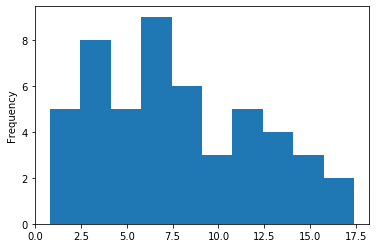

In [14]:
# MURDER:
data["Murder"].plot.hist()

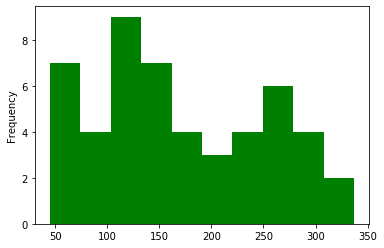

In [8]:
# ASSAULT:
data["Assault"].plot.hist(color='g')

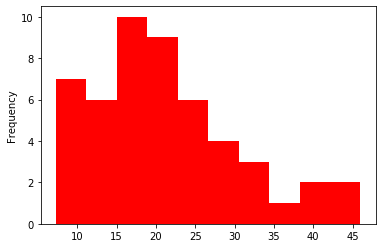

In [15]:
# RAPE
data["Rape"].plot.hist(color='r')

#### 2) Reescalar las variables:

In [10]:
data.head()

,State,Murder,Assault,Rape
0,Alabama,13.2,236,21.2
1,Alaska,10.0,263,44.5
2,Arizona,8.1,294,31.0
3,Arkansas,8.8,190,19.5
4,California,9.0,276,40.6


Arriba podemos ver que los valores de la variable Assault son bastante más grandes que los valores de Murder y Rape, por tanto nos convendría igualar algo más los datos reescalando esta variable.
Podemos dividir Assault entre 10 para conseguir unos valores más cercanos a los de Murder y Rape.

In [11]:
data['Assault'] = data['Assault'] / 10
data.head()

,State,Murder,Assault,Rape
0,Alabama,13.2,23.6,21.2
1,Alaska,10.0,26.3,44.5
2,Arizona,8.1,29.4,31.0
3,Arkansas,8.8,19.0,19.5
4,California,9.0,27.6,40.6


Tras esta modificación vemos que ahora los valores de todas las variables se encuentran más próximos unos a otros.

#### 3) K-Means 

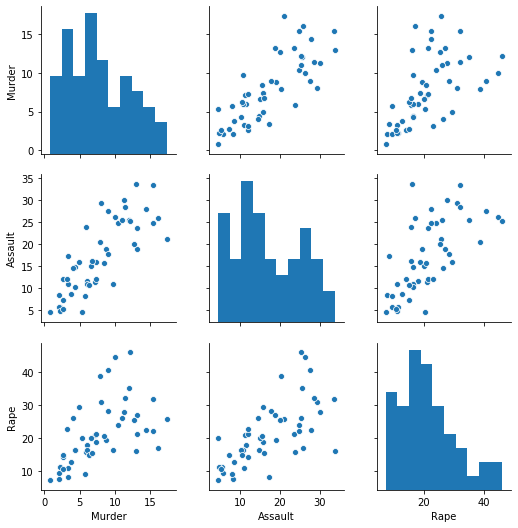

In [12]:
import seaborn as sns

sns.pairplot(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023379AEC348>,
      dtype=object)

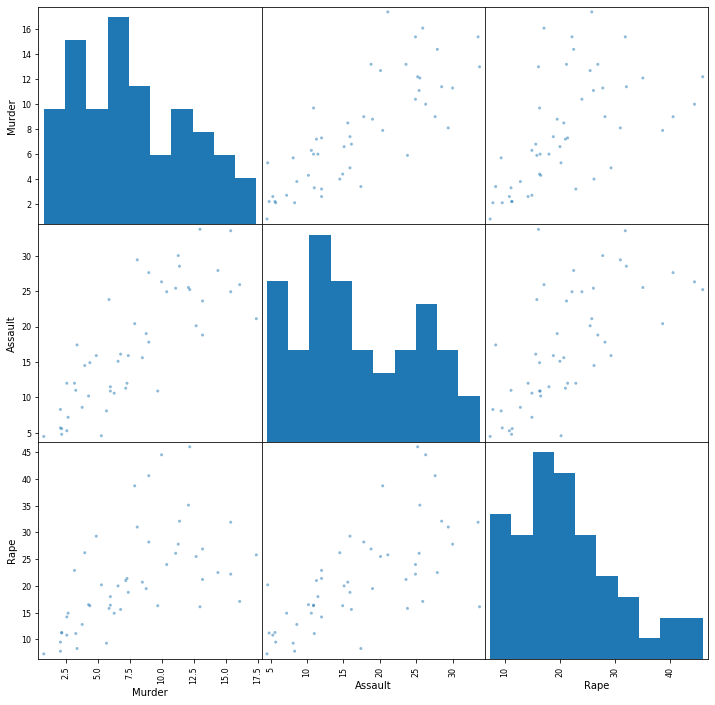

In [13]:
from pandas.plotting import scatter_matrix

scatter_matrix(data, figsize = (12, 12), diagonal = 'hist')

In [ ]:
# Crear una instancia del agrupador k-means
km = KMeans(init='random', n_clusters=3, random_state=333)

# Agrupar los puntos en clusters
km.fit(X)

# Podemos consultar el cluster asignado a cada punto y el centro de cada cluster
labels = km.labels_
centers = km.cluster_centers_

plot_clusters(X, labels, centers)